# Global Pollution Analysis and Energy Recovery
This notebook performs a comprehensive analysis of global pollution data and develops predictive models to estimate energy recovery and pollution severity.

## Phase 1: Data Collection and Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('Global_Pollution_Analysis.csv')
df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [3]:
# Check and handle missing values
df.isnull().sum()
# If any, we will fill them with mean for numeric and mode for categorical
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

In [ ]:
# Encode categorical features
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])
# Scaling numerical features
scaler = StandardScaler()
scaled_cols = ['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])
df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,77,2005,1.376167,0.193880,-0.619764,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,147,2001,-1.403578,-1.153098,1.028744,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,136,2016,-1.330788,-0.668076,1.142400,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,38,2018,1.494394,-1.009403,0.431675,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,46,2008,-0.021926,0.262567,1.138106,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


### Descriptive Statistics

In [ ]:
df.describe()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
count,200.000000,200.000000,2.000000e+02,2.000000e+02,2.000000e+02,200.00000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000
mean,88.575000,2009.335000,7.549517e-17,-3.552714e-16,2.486900e-16,52891.68150,260.448700,24.878100,27.799700,24492.893550,9.43575,104.271300,35307.602400
std,49.924107,5.765325,1.002509e+00,1.002509e+00,1.002509e+00,27224.49169,147.141923,14.470892,12.361879,14421.356002,5.57567,56.906574,19481.714455
min,0.000000,2000.000000,-1.947928e+00,-1.768540e+00,-1.650240e+00,1019.37000,11.730000,1.920000,5.040000,542.950000,0.53000,2.320000,1298.700000
25%,45.750000,2004.000000,-6.823730e-01,-8.536990e-01,-8.989775e-01,31201.97250,118.355000,11.220000,17.700000,12843.882500,4.58250,60.960000,19525.020000
50%,90.500000,2010.000000,4.122312e-02,-5.821733e-02,5.332837e-02,55299.15000,273.140000,25.355000,29.170000,24121.540000,9.22500,104.965000,35043.325000
75%,131.000000,2014.000000,8.489305e-01,8.935479e-01,8.265007e-01,74805.82500,384.957500,38.550000,37.072500,36516.232500,13.99750,150.930000,51629.547500
max,174.000000,2019.000000,1.753566e+00,1.775151e+00,1.837213e+00,99739.36000,499.980000,49.690000,49.560000,49852.280000,19.98000,198.820000,69143.140000


### Correlation Heatmap

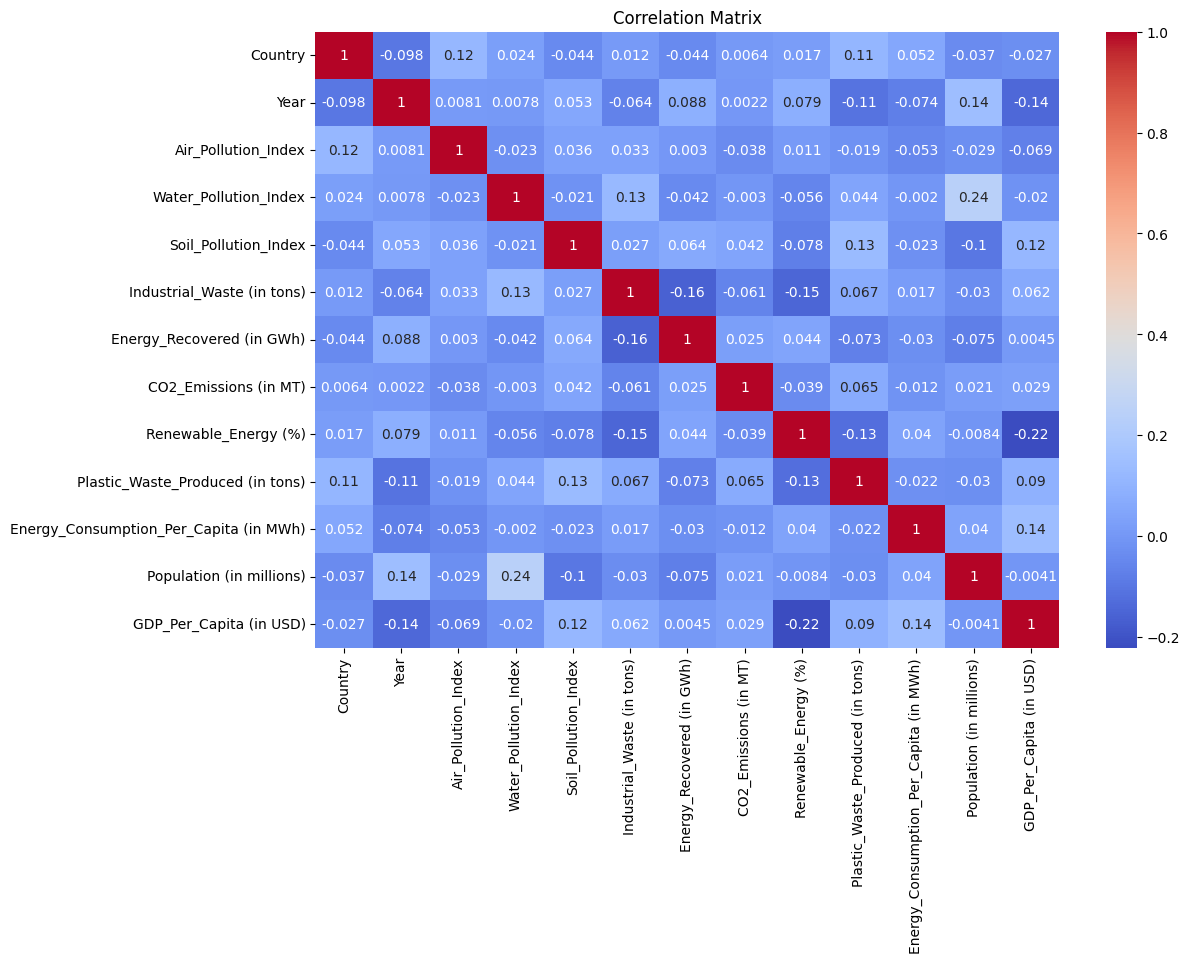

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Data Visualizations

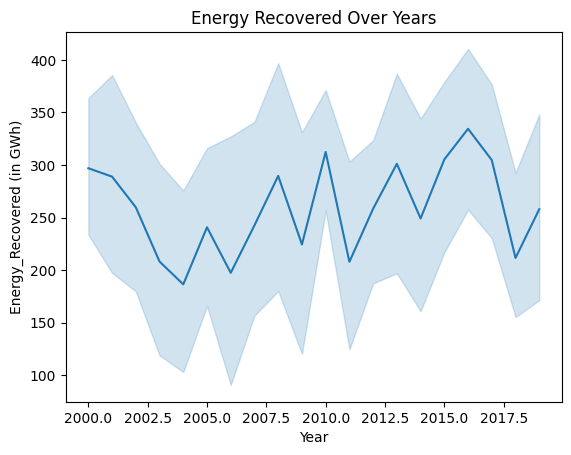

In [ ]:
# Line plot for Energy Recovery over Years
sns.lineplot(data=df, x='Year', y='Energy_Recovered (in GWh)')
plt.title('Energy Recovered Over Years')
plt.show()

## Feature Engineering

In [ ]:
# Calculate Energy Consumption per Capita again (if not in dataset)
df['Energy_Consumption_Per_Capita'] = df['Energy_Consumption_Per_Capita (in MWh)']
df['Energy_Consumption_Total'] = df['Energy_Consumption_Per_Capita'] * df['Population (in millions)']
df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD),Energy_Consumption_Per_Capita,Energy_Consumption_Total
0,77,2005,1.376167,0.193880,-0.619764,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96,12.56,530.2832
1,147,2001,-1.403578,-1.153098,1.028744,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41,5.23,717.8175
2,136,2016,-1.330788,-0.668076,1.142400,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15,13.15,1636.7805
3,38,2018,1.494394,-1.009403,0.431675,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51,0.78,52.8840
4,46,2008,-0.021926,0.262567,1.138106,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37,12.84,2394.9168


## Phase 2: Predictive Modeling

### Linear Regression - Predicting Energy Recovery

In [ ]:
X = df[['Air_Pollution_Index', 'CO2_Emissions (in MT)', 'Industrial_Waste (in tons)']]
y = df['Energy_Recovered (in GWh)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('R²:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R²: -0.02524886151206318
MSE: 24792.810514706925
MAE: 142.10502067262524


### Logistic Regression - Classifying Pollution Levels

              precision    recall  f1-score   support

        High       1.00      1.00      1.00         6
         Low       1.00      0.90      0.95        10
      Medium       0.96      1.00      0.98        24

    accuracy                           0.97        40
   macro avg       0.99      0.97      0.98        40
weighted avg       0.98      0.97      0.97        40



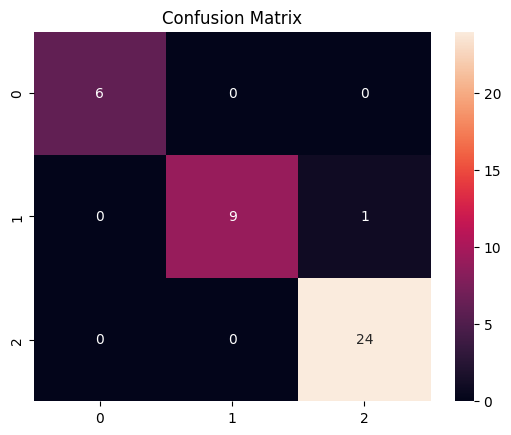

In [16]:
# Create pollution severity labels
df['Pollution_Severity'] = pd.cut(df['Air_Pollution_Index'], bins=[-np.inf, -1, 1, np.inf], labels=['Low', 'Medium', 'High'])
X_cls = df[['Air_Pollution_Index', 'CO2_Emissions (in MT)']]
y_cls = df['Pollution_Severity']
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)
clf = LogisticRegression(multi_class='multinomial', max_iter=200)
clf.fit(X_train_cls, y_train_cls)
y_pred_cls = clf.predict(X_test_cls)
print(classification_report(y_test_cls, y_pred_cls))
sns.heatmap(confusion_matrix(y_test_cls, y_pred_cls), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

## Phase 3: Reporting and Insights

# Model Evaluation and Comparison


Linear Regression Evaluation

In [15]:
print("Linear Regression Evaluation Metrics:")
print('R²:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


Linear Regression Evaluation Metrics:
R²: -0.02524886151206318
MSE: 24792.810514706925
MAE: 142.10502067262524


Logistic Regression Evaluation 

Logistic Regression Model Evaluation
Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         6
         Low       1.00      0.90      0.95        10
      Medium       0.96      1.00      0.98        24

    accuracy                           0.97        40
   macro avg       0.99      0.97      0.98        40
weighted avg       0.98      0.97      0.97        40



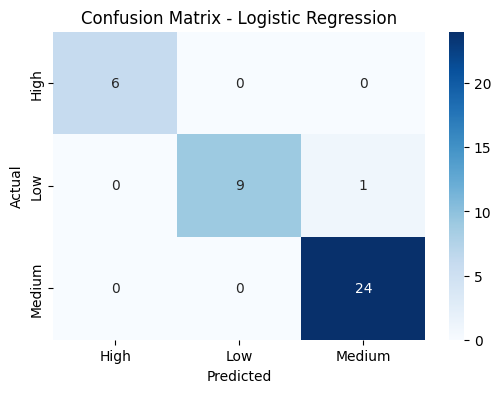

In [ ]:
print("Logistic Regression Model Evaluation")
print("Classification Report:")
print(classification_report(y_test_cls, y_pred_cls))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_cls, y_pred_cls)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


### Actionable Insights
High pollution levels (e.g., CO₂ emissions, industrial waste) are linked to lower energy recovery efficiency.
Countries with severe pollution and poor energy recovery could benefit from better waste-to-energy systems.

Key actions:
- Invest in clean technologies and waste-to-energy infrastructure.
- Enforce pollution control regulations.
- Encourage global collaboration and public awareness for sustainable practices.

